4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1838  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Big Sample Loss: 1.1212289333343506
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7661  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5818  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Small Sample Loss: 0.5251749157905579
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5283  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


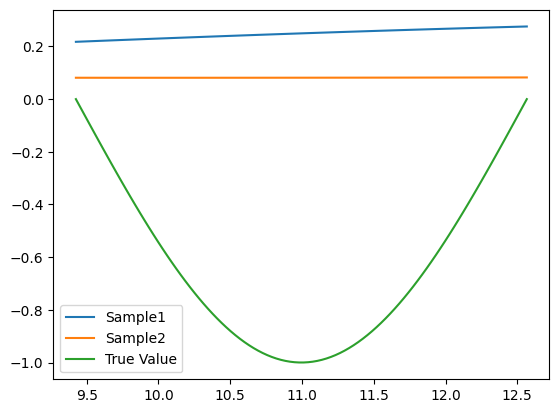

In [103]:
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.model_selection import train_test_split 

# 训练模型
def get_loss(i_x_train, i_x_test):
    y_train = np.sin(i_x_train)  
    # 创建浅层神经网络           
    model= Sequential()
    model.add(Dense(20,input_dim=1, activation='sigmoid')) # 非线性激活函数
    model.add(Dense(1,activation='sigmoid'))            # 输出层, 如果不写这层, 将会报错
    model.compile(optimizer='adam',loss='mean_squared_error')
    # 开始训练
    model.fit(i_x_train,y_train,epochs=100,verbose=0)
    # 测试集误差
    loss = model.evaluate(i_x_test,y_test)
    # 预测值
    y_pred = model.predict(i_x_test)
    return  loss , y_pred

# 生成训练集和测试集
np.random.seed(1)
Big_Sample = np.linspace(0, 3*pi,1000)   # 大样本 
Small_Sample = Big_Sample[np.random.choice(len(Big_Sample),size=100,replace=False)]
x_test = np.linspace(3*pi, 4*pi,100)
y_test = np.sin(x_test)

Big_Small_list = [Big_Sample,Small_Sample]
for i in range(2):
    if i==0:
        print("Big Sample Loss:",get_loss(Big_Small_list[i] ,x_test)[0])
    elif i==1:
        print("Small Sample Loss:",get_loss(Big_Small_list[i],x_test)[0])
# 绘制 预测值
    plt.plot(x_test,get_loss(Big_Small_list[i], x_test)[1] , label='Sample'+ str(i+1))
    
plt.plot(x_test,y_test, label='True Value')
plt.legend()




